In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Function to calculate divided differences
def divided_diff(x, y):
    n = len(x)
    coeff = np.zeros([n, n])
    coeff[:, 0] = y  # First column is y

    for j in range(1, n):
        for i in range(n - j):
            coeff[i][j] = (coeff[i + 1][j - 1] - coeff[i][j - 1]) / (x[i + j] - x[i])

    return coeff[0, :]  # Return the first row which holds the coefficients

In [12]:
# Function to calculate Newton polynomial at x_val
def newton_poly(x_data, coeff, x_val):
    n = len(x_data)
    result = coeff[0]
    product = 1.0
    
    for i in range(1, n):
        product *= (x_val - x_data[i - 1])
        result += coeff[i] * product
        
    return result

In [13]:
# Function to interpolate using Newton's method
def newton_interpolation(x_data, y_data, x_val):
    # Calculate divided difference table and get the coefficients
    coeff = divided_diff(x_data, y_data)
    # Evaluate the Newton polynomial at x_val
    return newton_poly(x_data, coeff, x_val)

In [14]:
# Example usage
x_data = np.array([1, 2, 3, 4, 5])
y_data = np.array([1, 4, 9, 16, 25])

# Generate points for plotting the interpolation
x_vals = np.linspace(min(x_data), max(x_data), 100)
y_interp_vals = [newton_interpolation(x_data, y_data, x) for x in x_vals]

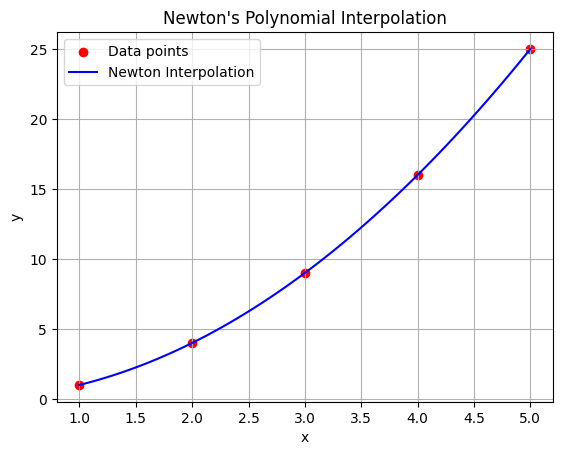

In [15]:
# Plotting
plt.scatter(x_data, y_data, color='red', label='Data points')
plt.plot(x_vals, y_interp_vals, label='Newton Interpolation', color='blue')
plt.title("Newton's Polynomial Interpolation")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


In [16]:
x_val = 2.5

# Get interpolated value
y_interp = newton_interpolation(x_data, y_data, x_val)
print(f"Interpolated value at x = {x_val} is {y_interp}")

Interpolated value at x = 2.5 is 6.25
